In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from pyclustering.nnet.som import type_conn
from matrixprofile import matrixProfile, motifs
# local code
import sys
sys.path.insert(0, os.path.abspath('../src'))
import dtwsom
import random

## 🎲 *Loading data*

In [2]:
D3011_data = np.load('dataset_TipAu_Au.npz')

In [3]:
D3011_data.keys()

KeysView(NpzFile 'dataset_TipAu_Au.npz' with keys: smoothedMeasuredHeight_m, vDeflection_N, height_m, measuredHeight_m, seriesTime_s...)

In [4]:
list(D3011_data.keys())

['smoothedMeasuredHeight_m',
 'vDeflection_N',
 'height_m',
 'measuredHeight_m',
 'seriesTime_s',
 'time_s']

In [5]:
force_data = D3011_data['vDeflection_N']

In [6]:
force_data.shape

(1024, 800)

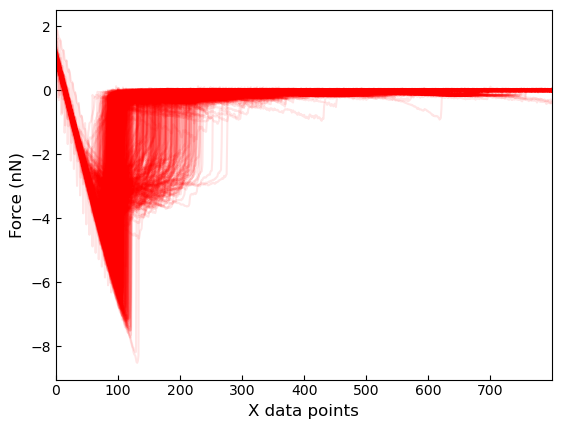

In [7]:
fig,ax = plt.subplots(dpi=100)

for curve in force_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_xlim([0,force_data.shape[1]-1])

#fig.savefig('../data/figures/pca_examples/D3011_curves.png',dpi=300,bbox_inches='tight')

plt.show()

***

## ➗ *Split train and test*

In [8]:
random.seed(1025)

In [9]:
random.shuffle(force_data)
force_data

array([[ 1.9760933 ,  1.931616  ,  1.8887263 , ..., -0.00411869,
        -0.0215863 , -0.02345659],
       [ 1.9760933 ,  1.931616  ,  1.8887263 , ..., -0.00411869,
        -0.0215863 , -0.02345659],
       [ 1.9760933 ,  1.931616  ,  1.8887263 , ..., -0.00411869,
        -0.0215863 , -0.02345659],
       ...,
       [ 1.1643936 ,  1.0557087 ,  0.92962   , ..., -0.0026224 ,
         0.02233213, -0.00452158],
       [ 1.109997  ,  0.9691998 ,  0.90435726, ..., -0.02609559,
         0.00477576, -0.00452958],
       [ 1.0474814 ,  0.9542267 ,  0.8717144 , ..., -0.01349924,
        -0.00624907,  0.02202465]])

In [10]:
train_data = force_data[:100]

test_data = force_data[100:]

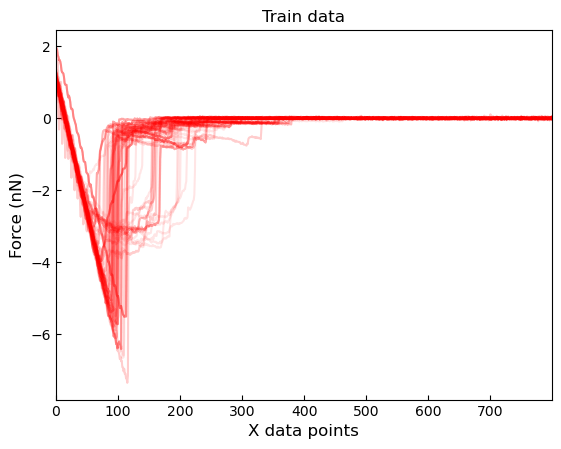

In [11]:
fig,ax = plt.subplots(dpi=100)

for curve in train_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Train data")

ax.set_xlim([0,train_data.shape[1]-1])

plt.show()

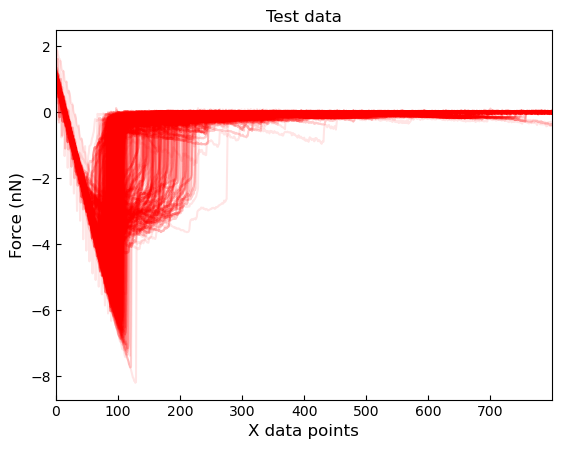

In [12]:
fig,ax = plt.subplots(dpi=100)

for curve in test_data:
    ax.plot(curve,c='red',alpha=0.1)

ax.set_xlabel('X data points',fontsize=12)
ax.set_ylabel('Force (nN)',fontsize=12)

ax.tick_params(labelsize=10,direction='in')

ax.set_title("Test data")

ax.set_xlim([0,test_data.shape[1]-1])

plt.show()

***

## 🧬 *Motif discovery with matrix profile*

In [13]:
size = len(train_data[0]) # x data points
sample_size = len(train_data) # rows
print(size, sample_size)

800 100


In [14]:
joined_data = train_data[0]
for i in range(1, len(train_data)):
    joined_data = np.concatenate((joined_data, train_data[i]))
len(joined_data)

80000

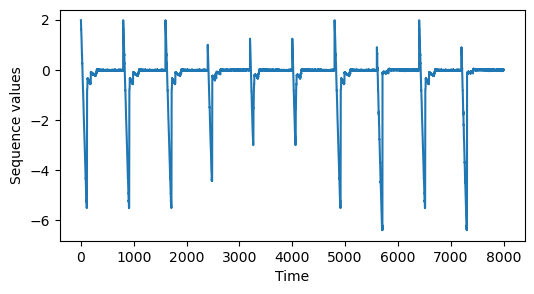

In [15]:
plt.figure(figsize=(6,3))
plt.plot(np.arange(8000), joined_data[:8000])
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

In [16]:
%%time
mp = matrixProfile.stomp(joined_data, size)

CPU times: user 39 s, sys: 0 ns, total: 39 s
Wall time: 39 s


In [17]:
mp 

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.02367705e-02, 6.78342916e-02, 1.38700918e-05]),
 array([  800.,   801.,   802., ..., 31998., 31999., 32000.]))

In [18]:
len(mp)

2

 Matrix Profile: 

In [19]:
mp[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       7.02367705e-02, 6.78342916e-02, 1.38700918e-05])

In [20]:
len(mp[0])

79201

Index of Matrix Profile:

In [21]:
mp[1]

array([  800.,   801.,   802., ..., 31998., 31999., 32000.])

In [22]:
len(mp[1])

79201

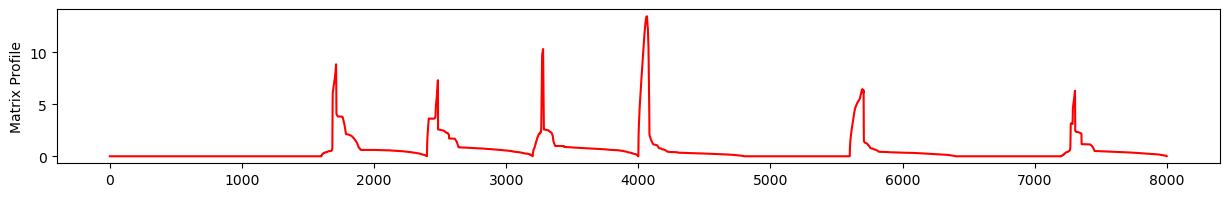

In [23]:
plt.figure(figsize=(15,2))
plt.plot(np.arange(8000), mp[0][:8000], color='red')
plt.ylabel("Matrix Profile")
plt.show()

In [24]:
%%time
mtfs, motif_d  = motifs.motifs(joined_data, mp, max_motifs=1000) # Computes the top k motifs from a matrix profile

CPU times: user 251 ms, sys: 0 ns, total: 251 ms
Wall time: 254 ms


mtfs = motifs (list of lists of indexes representing the motif starting locations)

In [25]:
print(mtfs) # Return the index of the main motif and its main neighbors
print()
print(len(mtfs))

[[np.int64(0), 800, np.int64(1600)], [np.int64(2400), 15200], [np.int64(3200), 4000, np.int64(19200)], [np.int64(4907), 6507], [np.int64(5308), 6908], [np.int64(8000), 28000], [np.int64(9600), 35200, np.int64(44000)], [np.int64(12000), 52000], [np.int64(12800), 78400], [np.int64(13600), np.int64(17600), 20800], [np.int64(22919), 47719], [np.int64(29600), 38400], [np.int64(30400), 33600], [np.int64(32800), 55200, np.int64(56800), np.int64(60000), np.int64(76800)], [np.int64(36800), 50400], [np.int64(10400), np.int64(39200)], [np.int64(40000), 68000, np.int64(72000)], [np.int64(40800), 54400], [np.int64(42400), 51200], [np.int64(44800), 77600], [np.int64(48800), 58400, np.int64(73600)], [np.int64(14400), 34400], [np.int64(28800), np.int64(45600), np.int64(57600), 64800], [np.int64(8800), 72800], [np.int64(22441), 47241], [np.int64(60800), 76000], [np.int64(32000), 79200], [np.int64(56000), 67200], [np.int64(27200), 36000], [np.int64(4506), np.int64(6106), np.int64(15706)], [np.int64(2204

motif_d = distances (list of minimum distances for each motif)

In [26]:
print(motif_d)
print()
print(len(motif_d))

[np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(2.220446049250313e-16), np.float64(4.5197459721872515e-06), np.float64(5.543552409928523e-06), np.float64(6.265579474457692e-06), np.float64(8.096145216945484e-06), np.float64(1.2901342405029156e-05), np.float64(1.3870091769957657e-05), np.float64(1.4484051323202689e-05), np.float64(1.72

In [27]:
motif_center_list = []
for motif in mtfs:
    center_pointers = list(np.arange(motif[0], motif[0]+size)) # Indexes of the central subsequence 
    # each center point start at the starting point of the significant motif (a time serie) and finish at the end of the serie
    motif_center_ts = joined_data[center_pointers] # use the indexes to extract the correspondent sequence in joined_data
    motif_center_list.append(motif_center_ts)

In [28]:
len(motif_center_list) 

47

***

## 🗺️ *SOM Training*

##### How the structure type affect the results? 

*Possibilities* ([Matrix Profile Github](https://github.com/target/matrixprofile-ts)):
1. grid_four ("Standard"): Grid type of connections when each oscillator has connections with left, upper, right, lower neighbors.
2. honeycomb: Grid type of connections when each oscillator has connections with left, upper-left, upper-right, right, right-lower, lower-left neighbors.
3. func_neighbor: Grid type of connections when existance of each connection is defined by the SOM rule on each step of simulation.
4. grid_eight: Grid type of connections when each oscillator has connections with left, upper-left, upper, upper-right, right, right-lower, lower, lower-left neighbors.


In [29]:
%time
rows = 3
cols = 3
structure = type_conn.grid_eight # enumeration of connection types for SOM (inheritance of pyclustering)
network = dtwsom.DtwSom(rows, cols, structure)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.91 µs


In [30]:
%%time
network.train(motif_center_list, 50)

Epoch 1 achieved an average quantization error of 3.9746
Epoch 2 achieved an average quantization error of 5.5954
Epoch 3 achieved an average quantization error of 5.8652
Epoch 4 achieved an average quantization error of 6.1265
Epoch 5 achieved an average quantization error of 6.1508
Epoch 6 achieved an average quantization error of 6.1539
Epoch 7 achieved an average quantization error of 5.9072
Epoch 8 achieved an average quantization error of 5.9589
Epoch 9 achieved an average quantization error of 6.1112
Epoch 10 achieved an average quantization error of 6.2813
Epoch 11 achieved an average quantization error of 6.2374
Epoch 12 achieved an average quantization error of 6.0843
Epoch 13 achieved an average quantization error of 5.9787
Epoch 14 achieved an average quantization error of 5.8876
Epoch 15 achieved an average quantization error of 5.9884
Epoch 16 achieved an average quantization error of 6.0229
Epoch 17 achieved an average quantization error of 6.0775
Epoch 18 achieved an av

50

***

## *Analysis of the results*

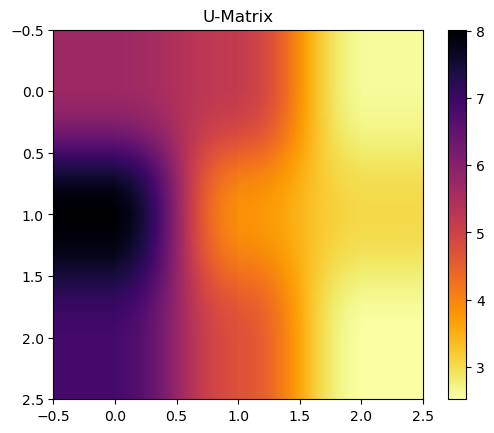

In [31]:
network.show_distance_matrix()

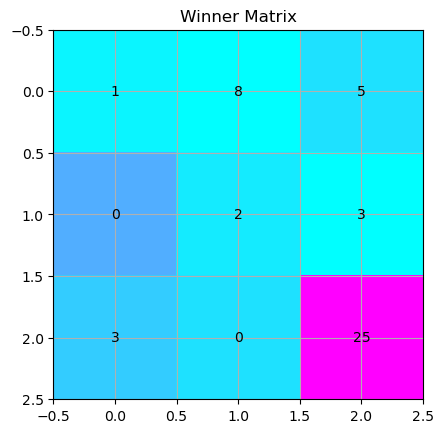

In [32]:
network.show_winner_matrix()

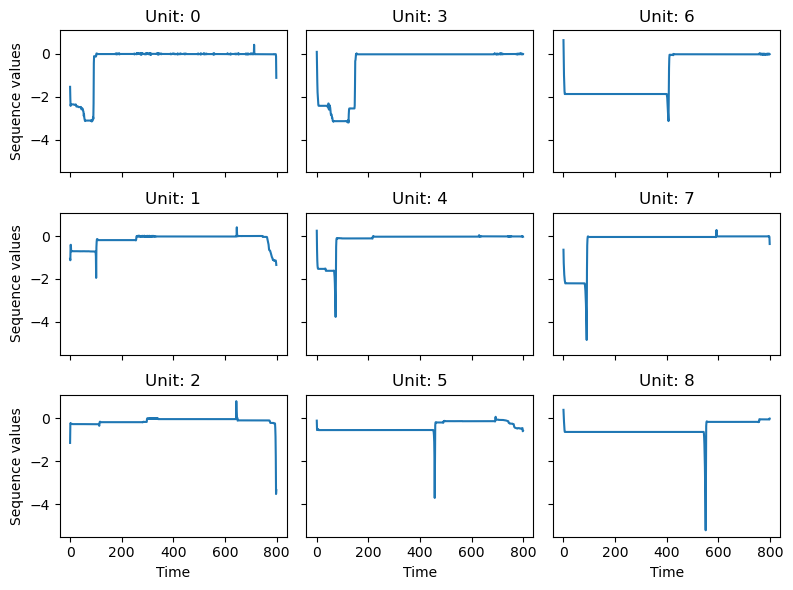

In [33]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(8, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3) # round numbers down to the nearest integer:
    #math.ceil: round a number UP to the nearest integer
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_title("Unit: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Sequence values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

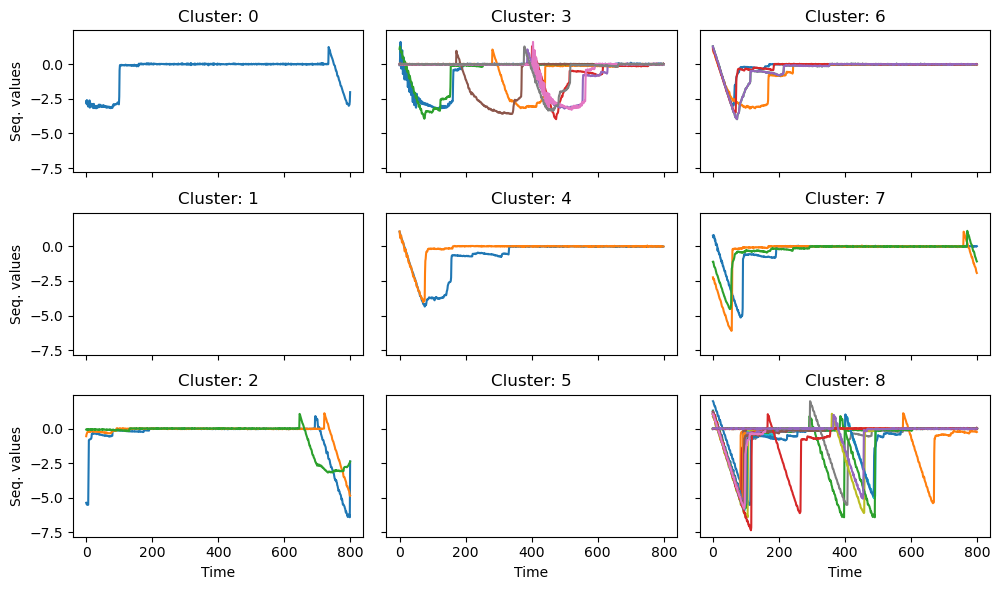

In [34]:
n = rows
n_neurons = network._size
fig, axs = plt.subplots(n,n,figsize=(10, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/n)
    row = neuron_index % n
    cluster_list = network.capture_objects[neuron_index]
    for member_index in cluster_list:
        axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
    axs[row, col].set_title("Cluster: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Seq. values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()

### Cluster 8

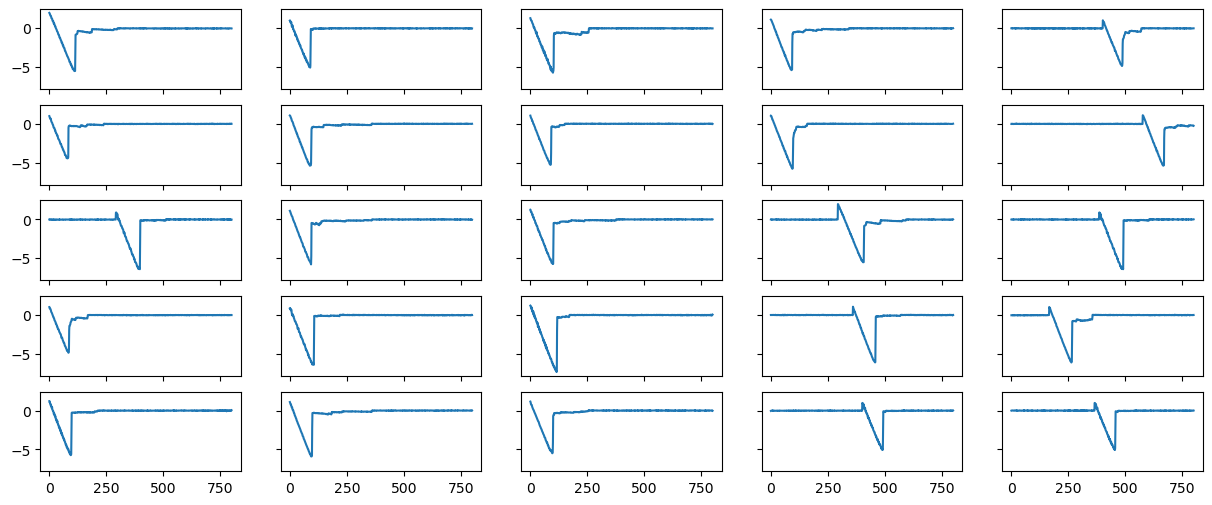

In [35]:
fig, axs = plt.subplots(5,5 ,figsize=(15, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[8]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/5)
    row = i % 5
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Cluster 3

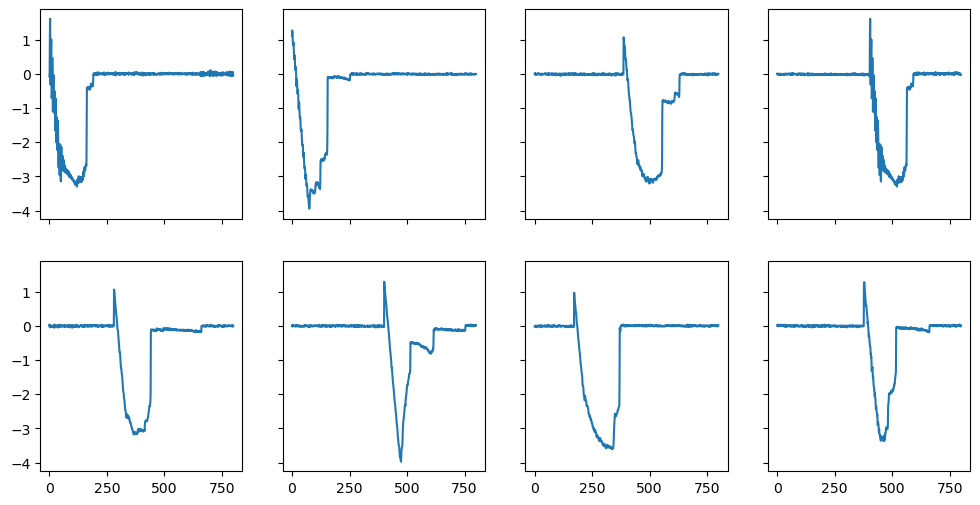

In [36]:
fig, axs = plt.subplots(2,4 ,figsize=(12, 6), sharex=True, sharey=True)
cluster_list = network.capture_objects[3]
for i, member_index in enumerate(cluster_list):
    col = math.floor(i/2)
    row = i % 2
    axs[row, col].plot(np.arange(len(motif_center_list[member_index])), motif_center_list[member_index])
plt.show()

### Pickle and Graphics

In [38]:
import pickle
with open("network_au_au.pkl", "wb") as model:
    pickle.dump(network, model)
    model.close()

In [39]:
network.capture_objects

[[40],
 [],
 [3, 34, 35],
 [7, 10, 28, 33, 42, 43, 44, 46],
 [18, 21],
 [],
 [2, 6, 13, 16, 45],
 [12, 24, 41],
 [0,
  1,
  4,
  5,
  8,
  9,
  11,
  14,
  15,
  17,
  19,
  20,
  22,
  23,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  36,
  37,
  38,
  39]]

In [40]:
import matplotlib.pyplot as plt
import plotly.express as px

In [41]:
representative_motifs_1 = network.capture_objects[8]

In [42]:
len(representative_motifs_1)

25

In [43]:
def recupera_ts(joined_ts_data, unit, network, mtfs, size, force_data):
    
    id_motifs = network.capture_objects #indices dos motifs em cada unidade
    curvas = []
    motifs = []
    p_mins = []
    
    for i in id_motifs[unit]: #pega o cluster de interesse
        motif = mtfs[i][0] #recupera o indice dos motifs do cluster de interesse
        motifs.append(motif)
    for motif in motifs: #analise o ponto de mínimo de cada motif
        p_min = min(joined_ts_data[motif:motif+size])
        p_mins.append(p_min)
        p_min_index = list(joined_ts_data[motif:motif+size]).index(p_min)
            
        if p_min_index < 100:
            idx_curva = motif // size 
            curvas.append(force_data[idx_curva])
                
        elif p_min_index >= 100 and p_min_index < 150:
            print(f"Duas curvas possíveis no motif {motif}")
            idx_curva_1 = motif // size 
            idx_curva_2 =motif // size + 1
                
            plt.plot(force_data[idx_curva_1], color="r")
            plt.title(f"Série temporal {idx_curva_1} do conjunto de dados")
            plt.xlabel('X data points',fontsize=12)
            plt.ylabel('Force (nN)',fontsize=12)
            plt.show()
                
            plt.plot(force_data[idx_curva_2], color="r")
            plt.title(f"Série temporal {idx_curva_2} do conjunto de dados")
            plt.xlabel('X data points',fontsize=12)
            plt.ylabel('Force (nN)',fontsize=12)
            plt.show()

            best_curve = input("Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas.")
                
            while best_curve not in [1,2,3]:
                print("Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.")
                best_curve = int(input("Identifique qual curva melhor se encaixa no cluster de interesse."))
                          
            if best_curve == 1:
                curvas.append([force_data[idx_curva_1]])
            elif best_curve == 2:
                curvas.append([force_data[idx_curva_2]])
            else:
                curvas.append([force_data[idx_curva_1],force_data[idx_curva_2]])
           
        else:
            idx_curva = motif // size + 1 
            curvas.append(force_data[idx_curva])
                
    return curvas, p_mins

Duas curvas possíveis no motif 0


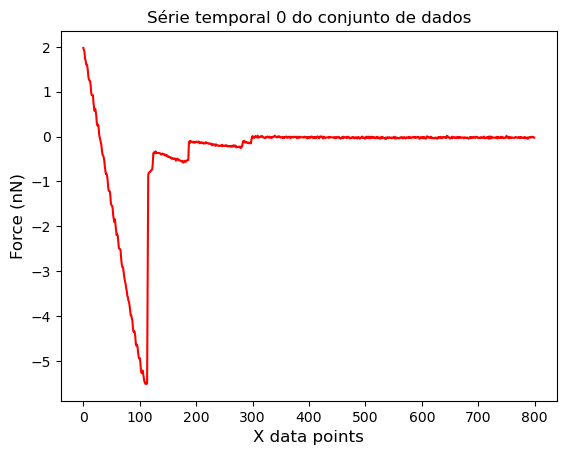

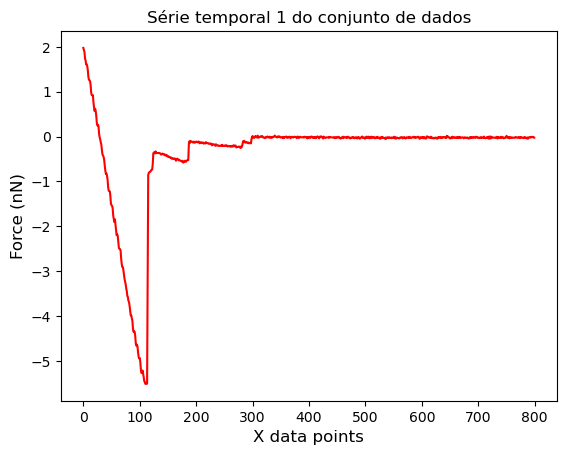

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 0


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 0


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


Duas curvas possíveis no motif 10400


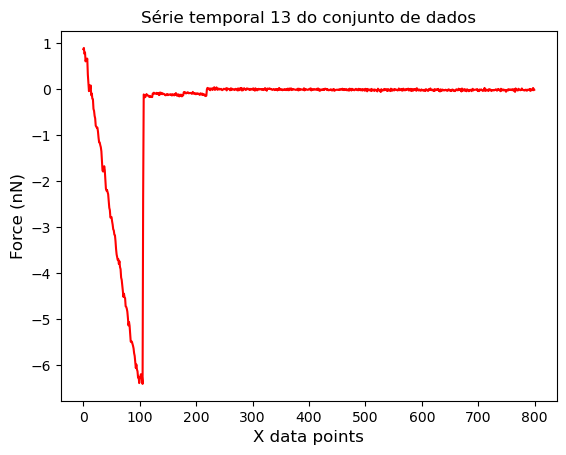

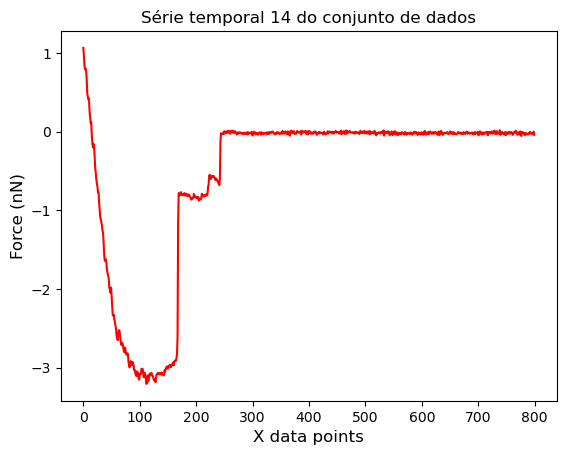

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 1


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


Duas curvas possíveis no motif 28800


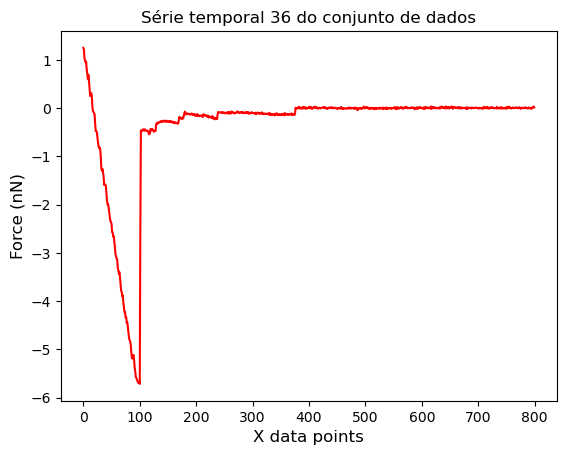

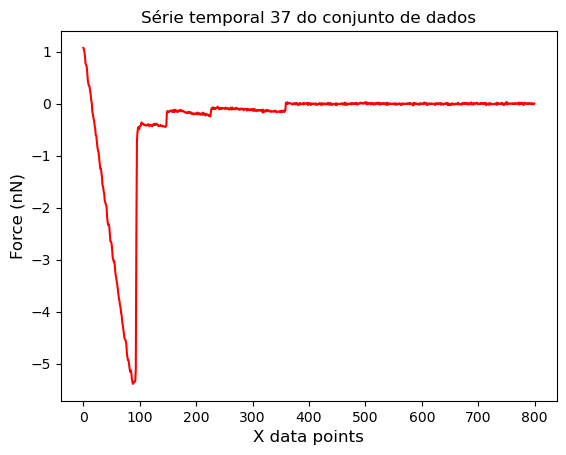

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 1


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


Duas curvas possíveis no motif 8800


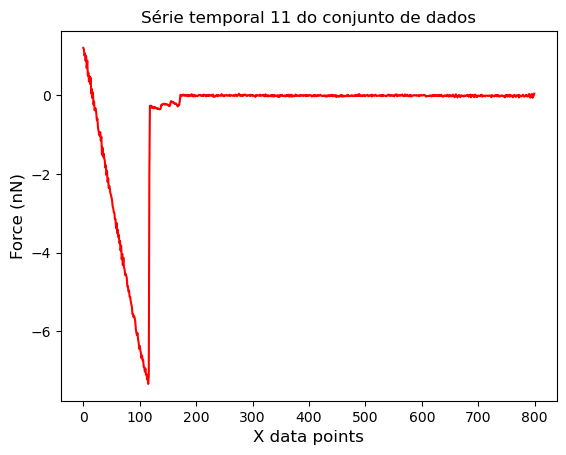

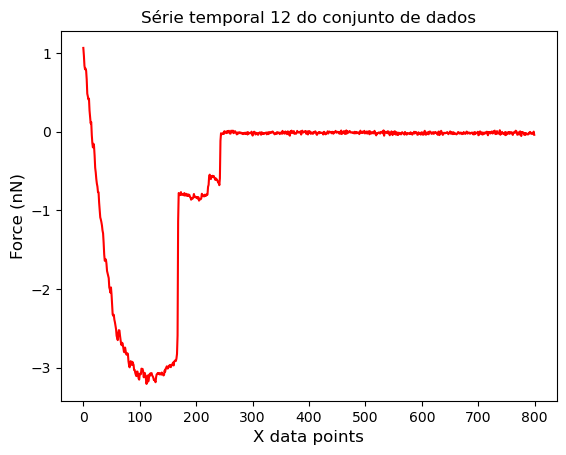

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 1


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


In [44]:
curvas, p_mins = recupera_ts(joined_data, 8, network, mtfs, size, force_data)

In [45]:
len(curvas)

25

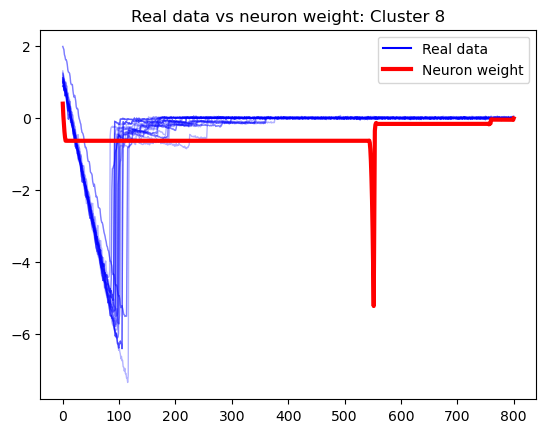

In [138]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias2 = curvas

y_principal2 = network.weights[8]

for y2 in ys_secundarias2:
    y2 = np.reshape(y2, (800,))
    plt.plot(list(x), list(y2), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal2, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 8")

# Exibir o gráfico
plt.show()

Duas curvas possíveis no motif 12000


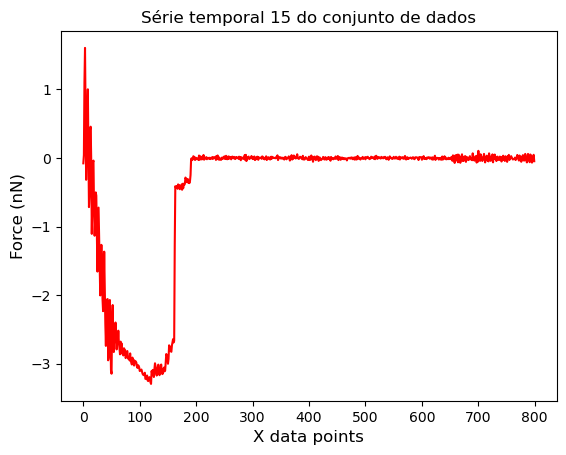

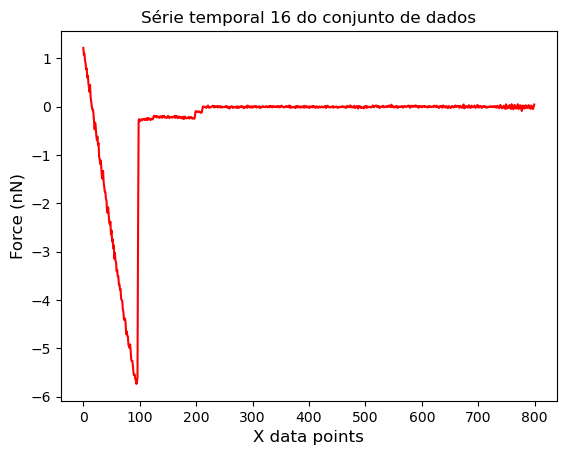

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 1


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


In [139]:
curvas_2, p_mins_2 = recupera_ts(joined_data, 3, network, mtfs, size, force_data)

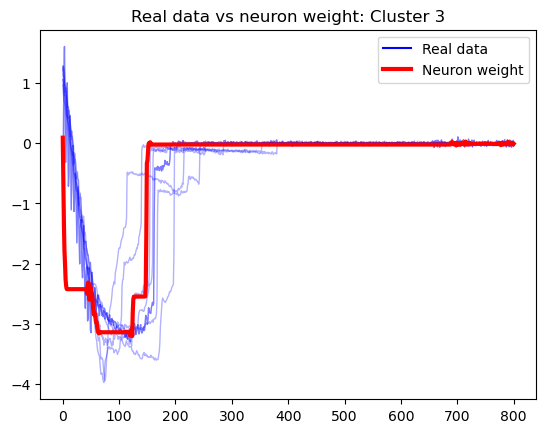

In [141]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias2 = curvas_2

y_principal2 = network.weights[3]

for y2 in ys_secundarias2:
    y2 = np.reshape(y2, (800,))
    plt.plot(list(x), list(y2), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal2, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 3")

# Exibir o gráfico
plt.show()

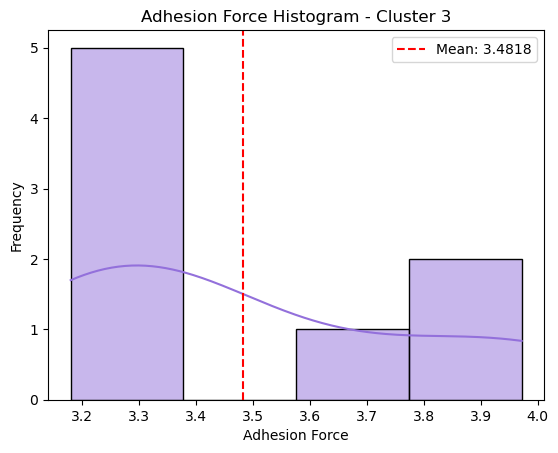

In [192]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde

p_mins_2 = list(map(lambda x: -x, p_mins_2))

eixo = sns.histplot(p_mins_2, kde=True, stat="count", color='mediumpurple')

plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean: {round(mean, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 3")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()


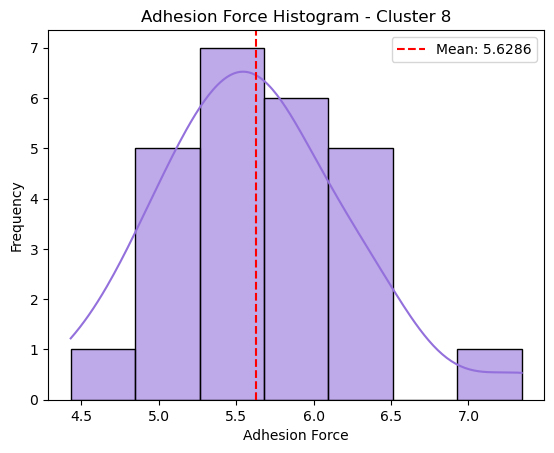

In [189]:
p_mins = list(map(lambda x: -x, p_mins))

eixo = sns.histplot(p_mins, kde=True, stat="count", alpha=0.6, color='mediumpurple')

mean, std = norm.fit(p_mins)

plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean: {round(mean, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 8")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()